# <b>Loading libraries</b>

In [1]:
import pandas as pd #to impory the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.neighbors#for the KNN model
import sklearn.linear_model
from sklearn.model_selection import train_test_split #to perform the splitting
import math


# <b>Loading dataset</b>

In [2]:
#I want to predict a target numeric value-review overall in that case,given a set of features (as i wrote in the next cell)

BeerReviews=pd.read_csv (r"C:\Users\yuval\beer_reviews.csv")#import DATASET to the notebook
BeerReviews

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


# <b>know and organize the dataset</b>

<b>Explanation about the columns:<b><br>
brewery_id-Brewery's id of the chosen beer<br>
brewery_name-Brewery's name of the chosen beer<br>
review_time-the time that the review has been given<br>
review_overall-Final review<br>
review_aroma-Aroma's reviews of the chosen beer<br>
review_appearance-The visual appearence of the beer<br>
review_profilename-Nickname of whom gave the review<br>
beer_style-beer style (English,American,German<br>
review_palate-review of combining texture,alchohol profile,mouthfeel- like user experience.<br>
review_taste-Taste's reviews of the chosen beer<br>
beer_name- Name of the chosen beer<br>
beer_abv-alcohol by volume<br>
beer_beerid- beer ID<br>

In [3]:
#I want to check what the range of all reviews(each column):
#by running both commands:
BeerReviews.max(axis = 0) 
BeerReviews.min(axis = 0) 
#Also can see it by use:
BeerReviews.describe()



,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


I discover that the range of the reviews are:<br>
review_overall 0-5<br>
review_aroma 1-5<br>
review_appearance 0-5<br>
review_palate 1-5<br>
review_taste 1-5<br>


In [4]:
#To get quick description of the data,particular about the total number of rows, 
#each attribute’s type, and the number of nonnull values
BeerReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [5]:
#I thought to change review time unit to dates and hours (more comfertable), like that:
#BeerReviews['review_time']=pd.to_datetime (BeerReviews['review_time'],unit='s')
#but to work with that df in the model i need the values to bee float,so i keep it in this value.


# <b>Duplicates value</b>

In [6]:
#if there are duplicate reviews- means that have the same review_profilename,beer_beerid,review_overall,review_time-i want to delete it
BeerReviews=BeerReviews.drop_duplicates(subset=['review_profilename','beer_beerid','review_overall','review_time'],keep=False)#remove duplicates on specifics columns
BeerReviews#why drop and not keep or do average? because probably mistake of the system and uncorrect values

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


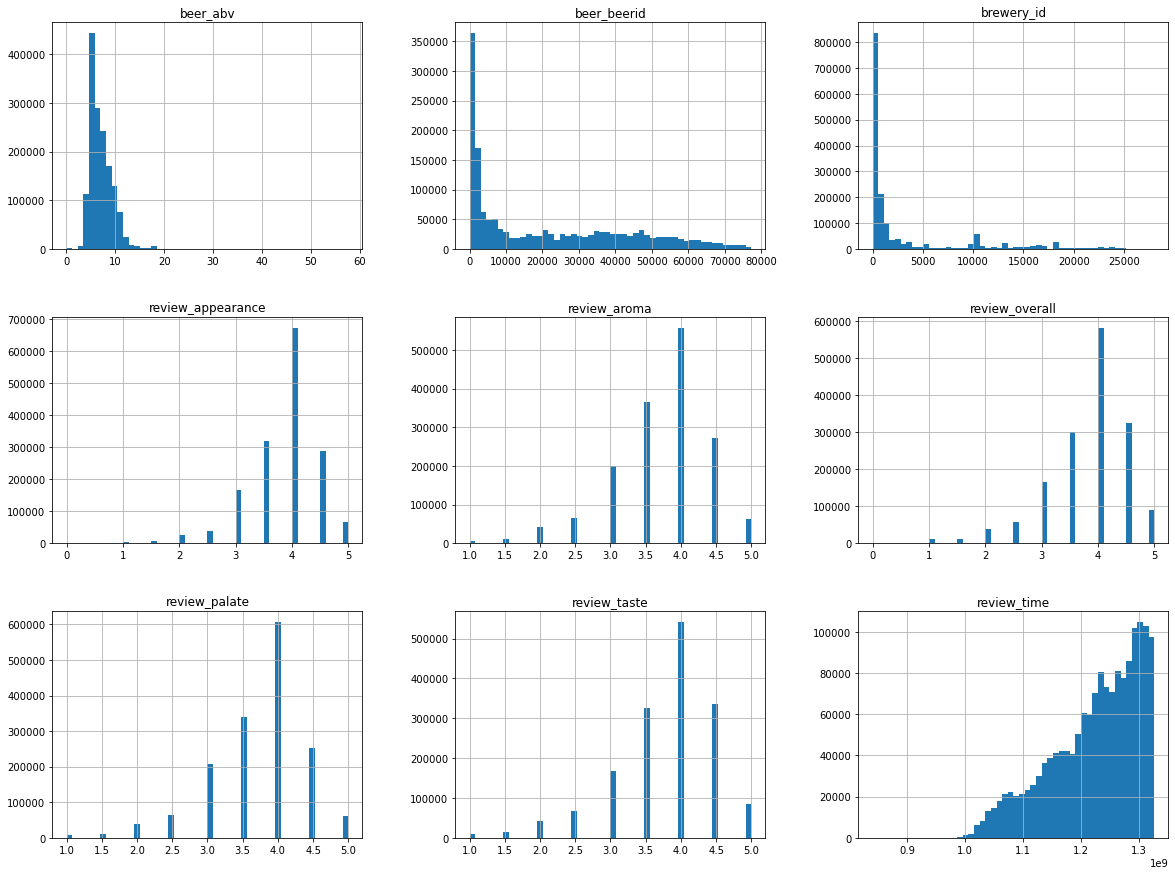

In [7]:
# Histogram of all numeric features
BeerReviews.hist(bins=50, figsize=(20,15))
plt.show()

conclusions from the histograms:<br>
1.beer_abv- most of the beers are less than 10% abv<br>
2.beer_beerid,brewery_id-the lower ID's have the larger nambers of reviews than the higher ID's<br>
3.review_appearance-most of the beers have been rates by 4<br>
4.review_aroma- most of the beers have been rates by 4<br>
5.review_overall-most of the beers have been rates by 4<br>
6.review_palate-most of the beers have been rates by 4<br>
7.review_taste-most of the beers have been rates by 4<br>



In [8]:
BeerReviews["beer_name"].value_counts() #to see how many kinds of beers there are in the dataset (56856)

90 Minute IPA                                3290
India Pale Ale                               3130
Old Rasputin Russian Imperial Stout          3111
Sierra Nevada Celebration Ale                3000
Two Hearted Ale                              2728
                                             ... 
Kraftbräu Robbie O'Soundman's Irish Stout       1
Akuna Gold                                      1
Imperial October Fest                           1
Greifenklau Pils                                1
Tenaya Creek Centennial Lager                   1
Name: beer_name, Length: 56856, dtype: int64

# <b>Nan values</b>

In [9]:
#check for null values
print(BeerReviews.isnull().sum())


brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67783
beer_beerid               0
dtype: int64


In [10]:
#first, i'll try to check if there are any breweries called CRAILSHEIMER
dftemp1=BeerReviews.query('beer_name=="CRAILSHEIMER"')#Also tried crailsheimer and Crailsheimer and didnt find anything
dftemp1=BeerReviews.query('beer_name=="SCHWABISCH GMUND"')#Same as before -there is also comment in this beer name
dftemp1=BeerReviews.query('beer_name=="Breakaway IPA"')#found that there are more beers called like this but in different style.still,ill change that they have the same brewery_name
dftemp1=BeerReviews.query('beer_name=="Caboose Oatmeal Stout"')##found that there are more beers called like this but in different style.still,ill change that they have the same brewery_name
dftemp1=BeerReviews.query('beer_name=="Hard Hat American Beer"')#only one beer called like this, in the next cells ill explain what im gonna do
dftemp1=BeerReviews.query('beer_name=="Side Pocket"')#only 2 bbers called like this,same as row before
dftemp1=BeerReviews.query('beer_name=="Caboose Oatmeal Stout"')##found that there are more beers called like this but in different style.still,ill change that they have the same brewery_name

dftemp1
#also can write all query in one line and write 'or' but i wanted to explain on each beer name what i've been doing

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
822526,24831,American Brewing Company,1325535022,4.0,4.0,4.0,timtwoface,Oatmeal Stout,3.5,4.5,Caboose Oatmeal Stout,7.0,66761
822527,24831,American Brewing Company,1324594647,4.5,4.5,4.5,oberon,Oatmeal Stout,5.0,4.5,Caboose Oatmeal Stout,7.0,66761
822528,24831,American Brewing Company,1321151918,4.5,3.5,3.5,loren01,Oatmeal Stout,4.5,4.5,Caboose Oatmeal Stout,7.0,66761
822529,24831,American Brewing Company,1319084458,4.0,4.0,4.0,flagmantho,Oatmeal Stout,4.0,4.0,Caboose Oatmeal Stout,7.0,66761
822530,24831,American Brewing Company,1312754960,4.0,4.0,4.0,barleywinefiend,Oatmeal Stout,3.5,4.5,Caboose Oatmeal Stout,7.0,66761
822531,24831,American Brewing Company,1311824406,4.5,4.5,4.5,NWer,Oatmeal Stout,4.5,4.5,Caboose Oatmeal Stout,7.0,66761
822532,24831,American Brewing Company,1298865577,4.0,4.0,4.0,beertunes,Oatmeal Stout,4.0,4.0,Caboose Oatmeal Stout,7.0,66761
1391053,27,NaN,1320995408,5.0,4.5,4.0,Docer,American Stout,4.5,4.5,Caboose Oatmeal Stout,7.0,75137


In [11]:
#so i checked in the internet and found that there is brewery called 'CRAILSHEIMER',and now i would like to chacge all the 
#brewery with nan values that comtain the word 'CRAILSHEIMER' in the beer_name to 'CRAILSHEIMER'.
for i in BeerReviews.index:#for every index in original df

    if 'WRONG BREWERY SEE CRAILSHEIMER' in BeerReviews.loc[i, 'beer_name']: #if the words 'WRONG BREWERY SEE CRAILSHEIMER'
        #is in cell in the column of beer name, than change the brewery_name from NaN to CRAILSHEIMER
        BeerReviews['brewery_name'][i]='CRAILSHEIMER'#assign value to specific cell
        
    if 'WRONG BREWERY SEE SCHWABISCH GMUND' in BeerReviews.loc[i, 'beer_name']:#if the words 'WRONG BREWERY SEE SCHWABISCH GMUND'
        #is in cell in the column of beer name, than change the brewery_name from NaN to SCHWABISCH GMUND
        BeerReviews['brewery_name'][i]='SCHWABISCH GMUND'#assign value to specific cell

        
    if 'Breakaway IPA' in BeerReviews.loc[i, 'beer_name']: #if the words 'Breakaway IPA'
        #is in cell in the column of beer name, than change the brewery_name from NaN to Baron Brewing
        BeerReviews['brewery_name'][i]='Baron Brewing'#assign value to specific cell

    if 'Caboose Oatmeal Stout' in BeerReviews.loc[i, 'beer_name']: #if the words 'Caboose Oatmeal Stout'
        #is in cell in the column of beer name, than change the brewery_name from NaN to American Brewing Company
        BeerReviews['brewery_name'][i]='American Brewing Company'#assign value to specific cell
        
#NaNbrewery_name['brewery_name']    
print(BeerReviews.isnull().sum())


<ipython-input-11-0e9a49e75782>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BeerReviews['brewery_name'][i]='SCHWABISCH GMUND'#assign value to specific cell
C:\Users\yuval\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-11-0e9a49e75782>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BeerReviews['brewe

brewery_id                0
brewery_name              3
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67783
beer_beerid               0
dtype: int64


In [12]:
#now i have 3 more NaN value left in the 'brewery_name' column, ill put in there the most popular brewery_name-means,
#the brewery with the highest review_overall mean
temp_Mean=BeerReviews.groupby(['brewery_name']).mean()#group all the same 'brewery_name' and compute the mean of each column
maxVal=temp_Mean.idxmax(axis=0)#now show me the brewery with the max values 
#i wasnt sure if there are few breweries with same max mean of review_overall,so i chcked it:
dftemp1=BeerReviews.query('brewery_name=="Bad Wörishofer Lowenbrau / Privatbrauerei Hotel Braugasthof"')
dftemp1#and saw its the same brewery
#so im gonna put in the left 3 breweries with nan values, this name:
print (maxVal[1])
BeerReviews['brewery_name']=BeerReviews['brewery_name'].fillna(value='Bad Wörishofer Lowenbrau / Privatbrauerei Hotel Braugasthof')
print(BeerReviews.isnull().sum())#now suppuse to be 0 NaN values in brewery_name category 


Telluride Brewing Co.


<ipython-input-12-dc0d9311f6e2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BeerReviews['brewery_name']=BeerReviews['brewery_name'].fillna(value='Bad Wörishofer Lowenbrau / Privatbrauerei Hotel Braugasthof')


brewery_id                0
brewery_name              0
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67783
beer_beerid               0
dtype: int64


In [13]:
#now ill take care of all NaN values of column 'review_profilename',
#the name doesnt really matter so ill change it to default value such as 'LoveBeer123'(already nicknames so its ok)
#select all rows with NaN values in 'review_profilename' column
NaN_profilename=BeerReviews[BeerReviews['review_profilename'].isna()]
temp_dup=NaN_profilename.groupby(['review_profilename','review_time','beer_name']).count()#group all reviews that have the same review_profilename,same review_time and same beer_name, to avoid duplicate count
temp_dup#there is no duplicates
#so ill change the names:
BeerReviews['review_profilename']=BeerReviews['review_profilename'].fillna('LoveBeer123')
print(BeerReviews.isnull().sum())#now suppuse to be 0 NaN values in review_profilename category 



<ipython-input-13-d71f600fa58b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BeerReviews['review_profilename']=BeerReviews['review_profilename'].fillna('LoveBeer123')


brewery_id                0
brewery_name              0
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename        0
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67783
beer_beerid               0
dtype: int64


In [14]:
#the last NaN values that left are the values in beer_abv category
#first of all ill create df of all NaN values in the column of beer_abv
NaNbeer_abv=BeerReviews[BeerReviews['beer_abv'].isna()]
NaNbeer_abv

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
273,1075,Caldera Brewing Company,1103668195,3.0,3.0,3.0,RedDiamond,American Stout,4.0,3.0,Cauldron Espresso Stout,NaN,21241
430,850,Moon River Brewing Company,1110736110,3.5,4.0,4.5,cMonkey,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
603,850,Moon River Brewing Company,1100038819,4.0,3.5,4.0,aracauna,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
733,1075,Caldera Brewing Company,1260673921,4.0,4.0,4.0,plaid75,American IPA,4.0,4.0,Alpha Beta,NaN,54723
798,1075,Caldera Brewing Company,1212201268,4.5,4.5,4.0,grumpy,American Double / Imperial Stout,4.0,4.5,Imperial Stout,NaN,42964
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586568,14359,The Defiant Brewing Company,1187052567,4.0,3.5,4.0,maddogruss,Bock,4.0,4.0,Bock,NaN,36424
1586587,14359,The Defiant Brewing Company,1177842168,3.5,4.5,4.0,BBM,Maibock / Helles Bock,4.5,4.0,Maibock,NaN,36555
1586596,14359,The Defiant Brewing Company,1287951067,4.0,3.0,5.0,hoppymcgee,Belgian Strong Pale Ale,4.0,3.5,Resolution #2,NaN,48360
1586597,14359,The Defiant Brewing Company,1241906223,4.5,4.5,4.0,WesWes,Belgian Strong Pale Ale,4.0,4.0,Resolution #2,NaN,48360


In [15]:
#first, ill check for every beer with NaN value of beer_abv if it already apper in the original df with different value 
#of beer_abv, if yes -ill change to this beer_abv, if not ill put the mean of the column beer_abv
#for i in BeerReviews.index:#for every index in original df
    #for j in NaNbeer_abv.index:
        #if NaNbeer_abv.loc[j, 'beer_name'] in BeerReviews.loc[i, 'beer_name'] and math.isnan(BeerReviews['beer_abv'][i])==False: #if the beer name in BeerReviews
        #is in cell in the column of beer name in beer_abvNaN , than change the beer_abv from NaN to what is appear in beer_abvNaN
            #NaNbeer_abv['beer_abv'][j]=BeerReviews['beer_abv'][i]#assign value to specific cell
            
#Now, for the rest NaN cells, ill put the mean of the column beer_abv 
#BeerReviews=BeerReviews['beer_abv'].fillna(value=BeerReviews['beer_abv'].mean())
BeerReviews['beer_abv'].fillna((BeerReviews['beer_abv'].mean()), inplace=True)
BeerReviews

C:\Users\yuval\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [16]:
print(BeerReviews.isnull().sum())#now suppuse to be 0 NaN values in all categories 


brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64


In [18]:
#one last thing im gonna do before the next level is to delete unuseful columns
#in addition i need to have only numeric values so im gonna fix it too

#first of all ill check if there is equal number of unique values to brewery_name and brewery_id
#and to beer_name and beer_beerid -so that i can delete the names columns and have only float columns (the id's columns)
print ("Uniqe breweries by brewery_id:",BeerReviews['brewery_id'].nunique())#number of uniqe breweries by brewery_id
print("Uniqe breweries by brewery_name:",BeerReviews['brewery_name'].nunique())#number of uniqe breweries by brewery_name

print ("Uniqe beers by beer_beerid:",BeerReviews['beer_beerid'].nunique())#number of uniqe beers by beer_beerid
print("Uniqe beers by beer_name:",BeerReviews['beer_name'].nunique())#number of uniqe beers by beer_name

#as we can see, the number IS NOT equal, so we cant delete the names columns  


Uniqe breweries by brewery_id: 5840
Uniqe breweries by brewery_name: 5744
Uniqe beers by beer_beerid: 66054
Uniqe beers by beer_name: 56856


In [19]:
#ill check again the type of each column, because i need all to be in float type because of sklearn
BeerReviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586610 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586610 non-null  int64  
 1   brewery_name        1586610 non-null  object 
 2   review_time         1586610 non-null  int64  
 3   review_overall      1586610 non-null  float64
 4   review_aroma        1586610 non-null  float64
 5   review_appearance   1586610 non-null  float64
 6   review_profilename  1586610 non-null  object 
 7   beer_style          1586610 non-null  object 
 8   review_palate       1586610 non-null  float64
 9   review_taste        1586610 non-null  float64
 10  beer_name           1586610 non-null  object 
 11  beer_abv            1586610 non-null  float64
 12  beer_beerid         1586610 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 209.5+ MB


In [20]:
#all int values ill change it to float:
BeerReviews['brewery_id']=BeerReviews['brewery_id'].astype(float)
BeerReviews['review_time']=BeerReviews['review_time'].astype(float)
BeerReviews['beer_beerid']=BeerReviews['beer_beerid'].astype(float)
BeerReviews.info()

<ipython-input-20-265b41bb2acd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BeerReviews['brewery_id']=BeerReviews['brewery_id'].astype(float)
<ipython-input-20-265b41bb2acd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BeerReviews['review_time']=BeerReviews['review_time'].astype(float)
<ipython-input-20-265b41bb2acd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586610 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586610 non-null  float64
 1   brewery_name        1586610 non-null  object 
 2   review_time         1586610 non-null  float64
 3   review_overall      1586610 non-null  float64
 4   review_aroma        1586610 non-null  float64
 5   review_appearance   1586610 non-null  float64
 6   review_profilename  1586610 non-null  object 
 7   beer_style          1586610 non-null  object 
 8   review_palate       1586610 non-null  float64
 9   review_taste        1586610 non-null  float64
 10  beer_name           1586610 non-null  object 
 11  beer_abv            1586610 non-null  float64
 12  beer_beerid         1586610 non-null  float64
dtypes: float64(9), object(4)
memory usage: 209.5+ MB


In [21]:
#now i need to change review_profilename,brewery_name,beer_name and beer_style -every unique object value to unique numeric values
BeerReviews[['brewery_name','review_profilename','beer_style','beer_name']]=BeerReviews[['brewery_name','review_profilename','beer_style','beer_name']].stack().rank(method='dense').unstack()
#explanations about what i did:
#first, write all the columns that i want to put numaric unique value
#after that: .stack= Stack the prescribed levels from columns to index.
#after: .rank(method='dense')
#***************************************************************************************************


C:\Users\yuval\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [22]:
BeerReviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586610 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586610 non-null  float64
 1   brewery_name        1586610 non-null  float64
 2   review_time         1586610 non-null  float64
 3   review_overall      1586610 non-null  float64
 4   review_aroma        1586610 non-null  float64
 5   review_appearance   1586610 non-null  float64
 6   review_profilename  1586610 non-null  float64
 7   beer_style          1586610 non-null  float64
 8   review_palate       1586610 non-null  float64
 9   review_taste        1586610 non-null  float64
 10  beer_name           1586610 non-null  float64
 11  beer_abv            1586610 non-null  float64
 12  beer_beerid         1586610 non-null  float64
dtypes: float64(13)
memory usage: 209.5 MB


# <b>split to train set and test set</b>

In [23]:
#split the data into labels and features 
y=BeerReviews.review_overall #review_overall is the label we want to predict
x=BeerReviews.drop('review_overall',axis=1)#use drop function to take all other data in x

In [24]:
#split the data to test set and train set 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)#we will tale 20% of the dataset to testing and the rest for training


In [28]:
#save the data by exporting it to csv file

x_train.to_csv(r"C:\Users\yuval\Datasets\x_train.csv")
x_test.to_csv(r"C:\Users\yuval\Datasets\x_test.csv")
y_train.to_csv(r"C:\Users\yuval\Datasets\y_train.csv")
y_test.to_csv(r"C:\Users\yuval\Datasets\y_test.csv")

In [31]:
#now i need to import them back
first_train=pd.read_csv (r"C:\Users\yuval\Datasets\x_train.csv")#import DATASETS to the notebook
first_test=pd.read_csv (r"C:\Users\yuval\Datasets\x_test.csv")
check_train=pd.read_csv (r"C:\Users\yuval\Datasets\y_train.csv")
check_test=pd.read_csv (r"C:\Users\yuval\Datasets\y_test.csv")


In [33]:
model=sklearn.linear_model.LinearRegression()#select a linear model
model.fit(first_train,check_train) #train the model
Predictions=model.predict(first_test)

In [34]:
#now we gonna measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error() function:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(check_train,Predictions)#Mean Square Error
RMSE=np.sqrt(MSE)#Root Mean Square Error
RMSE

ValueError: Found input variables with inconsistent numbers of samples: [1269288, 317322]

In [ ]:

x_train.shape

In [ ]:
beer_reviews_predictions=lin_reg.predict

In [ ]:
#for the KNN model
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)#select KNN 


In [ ]:
#want to check if there are duplicates reviews-means that same person reviewed same beer few times
#if there are cases like this i would like to do average between the review_overall of those duplication 
doubleRev=BeerReviews.groupby(['review_profilename', 'beer_name']).mean()#group all reviews that have the same review_profilename and same beer_name, to avoid duplicate count
doubleRev

In [ ]:
doubleRev=BeerReviews[BeerReviews.duplicated()] 
doubleRev
df = pd.DataFrame(BeerReviews, columns = ['review_profilename', 'beer_name']) # Creating a DataFrame object 
# Selecting duplicate rows based 
# on list of column names 
duplicate = df[df.duplicated(['review_profilename' , 'beer_name'])] 
  
print("Duplicate Rows :") 
# Print the resultant Dataframe 
duplicate.sort_values('beer_name')

In [ ]:
print ("hey")

In [ ]:
#select all rows with NaN values in 'brewery_name' column
#NaNbrewery_name=BeerReviews[BeerReviews['brewery_name'].isna()]
NaNbrewery_name=BeerReviews['brewery_name'].isna()
NaNbrewery_name
******************************************************************************************

In [ ]:
#so i checked in the internet and found that there is brewery called 'CRAILSHEIMER',and now i would like to chacge all the 
#brewery with nan values that comtain the word 'CRAILSHEIMER' in the beer_name to 'CRAILSHEIMER'.
for i in NaNbrewery_name.index:
    if 'WRONG BREWERY SEE CRAILSHEIMER' in NaNbrewery_name.loc[i, 'beer_name']: #if the words 'WRONG BREWERY SEE CRAILSHEIMER'
        #is in cell in the column of beer name, than change the brewery_name from NaN to CRAILSHEIMER
        NaNbrewery_name.loc[i,'brewery_name']='CRAILSHEIMER'
        
    if 'WRONG BREWERY SEE SCHWABISCH GMUND' in NaNbrewery_name.loc[i, 'beer_name']:#if the words 'WRONG BREWERY SEE SCHWABISCH GMUND'
        #is in cell in the column of beer name, than change the brewery_name from NaN to SCHWABISCH GMUND
        NaNbrewery_name.loc[i,'brewery_name']='SCHWABISCH GMUND'
        
    if 'Breakaway IPA' in NaNbrewery_name.loc[i, 'beer_name']: #if the words 'Breakaway IPA'
        #is in cell in the column of beer name, than change the brewery_name from NaN to Baron Brewing
        NaNbrewery_name.loc[i,'brewery_name']='Baron Brewing'
        
    if 'Caboose Oatmeal Stout' in NaNbrewery_name.loc[i, 'beer_name']: #if the words 'Caboose Oatmeal Stout'
        #is in cell in the column of beer name, than change the brewery_name from NaN to American Brewing Company
        NaNbrewery_name.loc[i,'brewery_name']='American Brewing Company'
NaNbrewery_name['brewery_name']    

In [ ]:
#want to check if there are duplicates review-means that same person reviewed same beer, same review_time-few times
#if there are cases like this i would like to do average between all values of those duplication 
doubleRev=BeerReviews.groupby(['review_profilename', 'beer_name','review_time']).size()#group all reviews that have the same review_profilename,same review_time and same beer_name, to avoid duplicate count
duplicate=doubleRev>1 #if size more than 1,it means we have more than one value with same data
duplicate.value_counts()#there are 7 duplicates
#now we will change the values to be the mean
BeerReviews=BeerReviews.groupby(['review_profilename', 'beer_name','review_time','brewery_name','beer_style','beer_abv']).mean().reset_index()#added the reset index because i dont wand the index to be 'review_profilename'
BeerReviews
#******************************************************************************************
